<a href="https://colab.research.google.com/github/jaidatta71/Chatbot/blob/main/EDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Self-Study Colab Activity 4.5: Analyzing a Real-World Dataset

#### Exploring Credit Risks

This activity is another open exploration of a dataset using both cleaning methods and visualizations.  The data describes customers as good or bad credit risks based on a small set of features specified below.  Your task is to create a Jupyter notebook with an exploration of the data using both your `pandas` cleaning and analysis skills and your visualization skills using `matplotlib`, `seaborn`, and `plotly`.  Your final notebook should be formatted with appropriate headers and markdown cells with written explanations for the code that follows.

Post your notebook file in Canvas, as well as a brief (3-4 sentence) description of what you found through your analysis. Respond to your peers with reflections on their analysis.




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### Data Description

```
1. Status of an existing checking account, in Deutsche Mark.
2. Duration in months
3. Credit history (credits taken, paid back duly, delays, critical accounts)
4. Purpose of the credit (car, television,...)
5. Credit amount
6. Status of savings account/bonds, in Deutsche Mark.
7. Present employment, in number of years.
8. Installment rate in percentage of disposable income
9. Personal status (married, single,...) and sex
10. Other debtors / guarantors
11. Present residence since X years
12. Property (e.g., real estate)
13. Age in years
14. Other installment plans (banks, stores)
15. Housing (rent, own,...)
16. Number of existing credits at this bank
17. Job
18. Number of people being liable to provide maintenance for
19. Telephone (yes, no)
20. Foreign worker (yes, no)
```

In [6]:

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('drive/MyDrive/dataset_31_credit-g.csv')

In [20]:
df.head(3)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

## Understand the Correlations among Numerical Features
Compute how numerical features correlated with class type `good` and `bad` separately

## Findings

1. Higher credit amounts are indicative of favorable credit classifications.
2. A higher installment rate as a percentage of disposable income correlates with lower credit amounts and is often associated with a 'bad' credit classification.

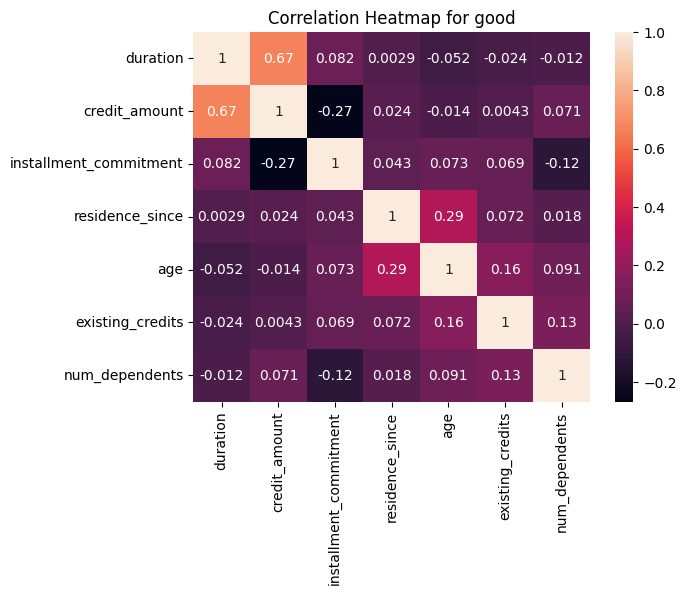

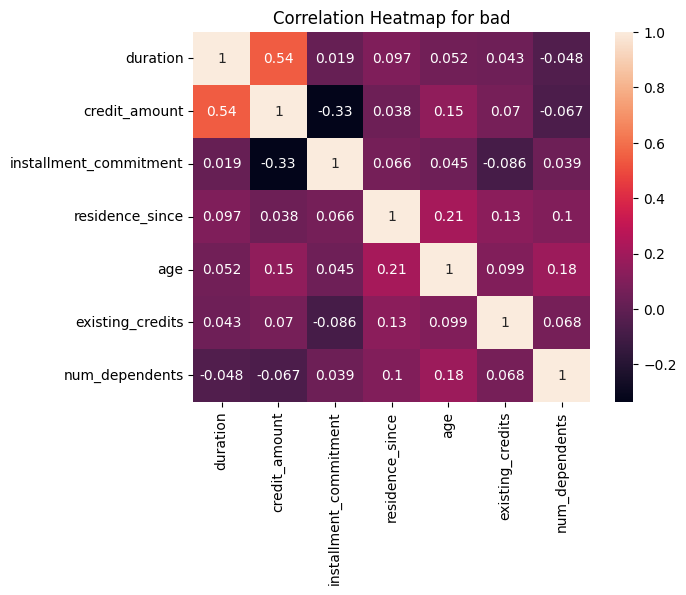

In [31]:

#df["class"].value_counts()
#df = df.drop_duplicates()
#df.isnull().sum().sort_values()

#df.rename(columns={'class': 'credit_class'}, inplace=True)
#df.columns
cc_list = df["credit_class"].unique()

for i in cc_list:
  df1 = df[df["credit_class"]==i]
  int_df = df1.select_dtypes(include=['int64','float64'])
  corr = int_df.corr()
  sns.heatmap(corr, annot=True)
  plt.title(f'Correlation Heatmap for {i}')
  plt.show()


## Remove all leading and trailing apostrophes for String Objects.

In [33]:
# Remove all leading and trailing apostrophes for String Objects
for i in df.columns:
  #df1.select_dtypes(include=['int64','float64'])
  if df[i].dtype == 'object':
    df[i] = df[i].str.strip("'")

  #telugu_states["population"].str.replace(",","")
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,credit_class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [34]:
df["personal_status"].value_counts()

,count
personal_status,
male single,548
female div/dep/mar,310
male mar/wid,92
male div/sep,50


## Analyze and split the `personal_status` column using string function and create two new columns 'Sex' and "Marriage_Status"

In [40]:
# split personal_status into 2 new columns as below
df["sex"] = df["personal_status"].str.split(" ").str[0]
df["marriage_status"] = df["personal_status"].str.split(" ").str[1]
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,credit_class,marriage_status,sex
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,none,own,2,skilled,1,yes,yes,good,single,male
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,none,own,1,skilled,1,none,yes,bad,div/dep/mar,female
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,none,own,1,unskilled resident,2,none,yes,good,single,male
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,none,for free,1,skilled,2,none,yes,good,single,male
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,none,for free,2,skilled,2,none,yes,bad,single,male


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

## Replace the typo 'dep' to 'sep' for marriage_status.

Based on the value counts results, the values of `personal_status` equal to `male single` and `personal_status` equal to `female div/dep/mar` are the majority of the sample.

Therefore, it doesn't make sense to further to split `marriage_status` column. Additionally, we can not determine the break down female's marriage_status into more finer levels, say , `div`, `dep` or `mar`.


In [65]:
# Replace value in marriage status "/dep/" to "/sep/"
df["marriage_status"] = df["marriage_status"].str.replace("dep","sep")
# Create a contingency table. It is used to visually summarize the relationship between two or more categorical variables,
# allowing analysts to easily identify potential associations or dependencies between them,
# often through the application of statistical tests like the Chi-square test to determine the significance of these relationships

categorical_columns = df.select_dtypes(include=['object','category']).columns     # Adjust as necessary

for i in categorical_columns:
  if i!= 'credit_class':
    contingency_table = pd.crosstab(index= df[i], columns= df["credit_class"])
    print(f"contingency_table for {i}:\n", contingency_table)
    print("\n")

## Findings how category features relates to the credit_class outcome ( bad vs good)
#
#- People that have a existing paid credit history tend to have good credit class.
#- People that have a longer employment tend to have good credit class.
#- Single males tend to have a good credit class.
#- People with assets like car, real estate, or life insurance tend to have a good credit class.
#- People who own a house boost their credit class.
#- Skilled jobs have a good credit class.

contingency_table for checking_status:
 credit_class     bad  good
checking_status           
0<=X<200         105   164
<0               135   139
>=200             14    49
no checking       46   348


contingency_table for credit_history:
 credit_class                    bad  good
credit_history                           
all paid                         28    21
critical/other existing credit   50   243
delayed previously               28    60
existing paid                   169   361
no credits/all paid              25    15


contingency_table for purpose:
 credit_class         bad  good
purpose                       
business              34    63
domestic appliance     4     8
education             22    28
furniture/equipment   58   123
new car               89   145
other                  5     7
radio/tv              62   218
repairs                8    14
retraining             1     8
used car              17    86


contingency_table for savings_status:
 credit_class    

## Findings how category features relates to the credit_class outcome ( bad vs good)

- People that have a existing paid credit history tend to have good credit class.
- People that have a longer employment tend to have good credit class.
- Single males tend to have a good credit class.
- People with assets like car, real estate, or life insurance tend to have a good credit class.
- People who own a house boost their credit class.
- Skilled jobs have a good credit class.

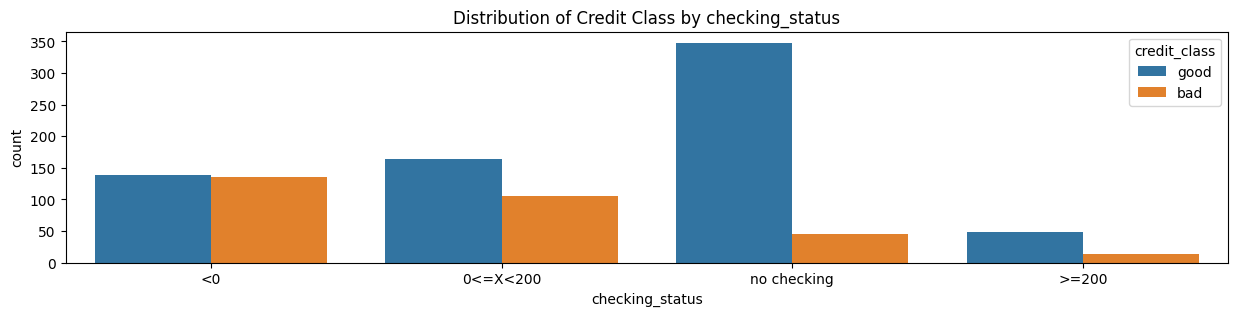

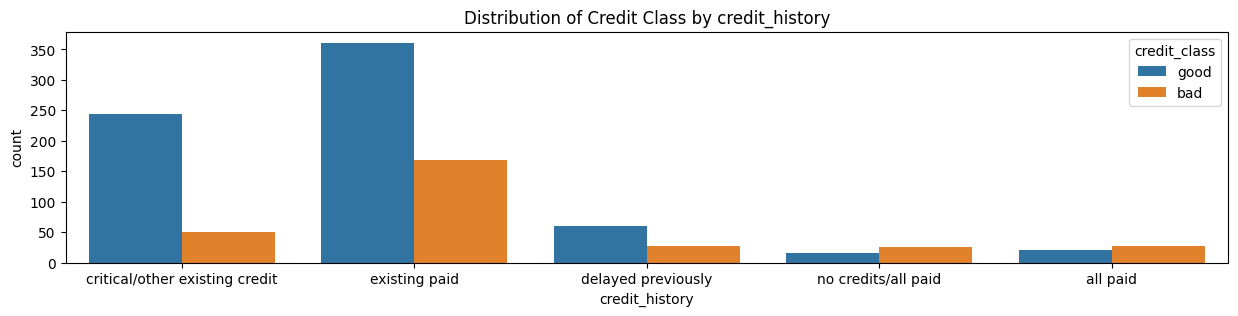

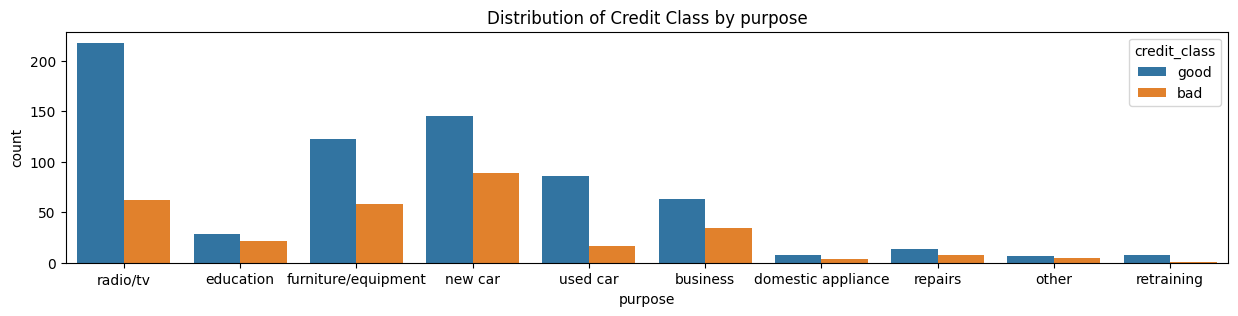

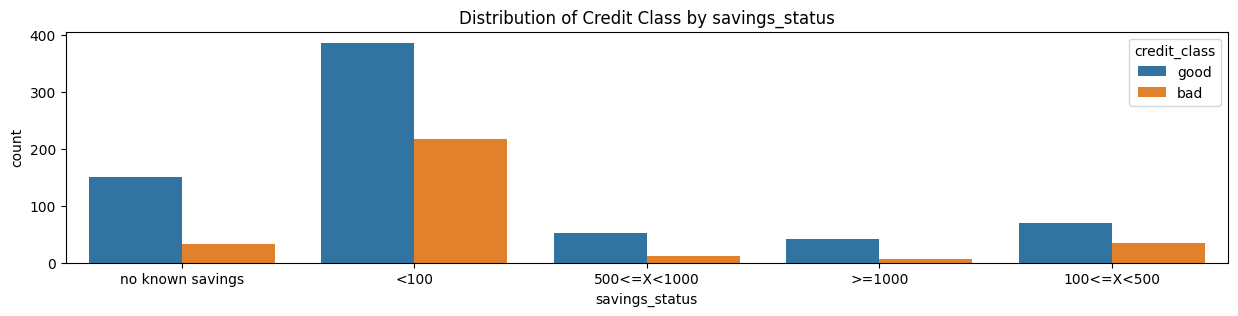

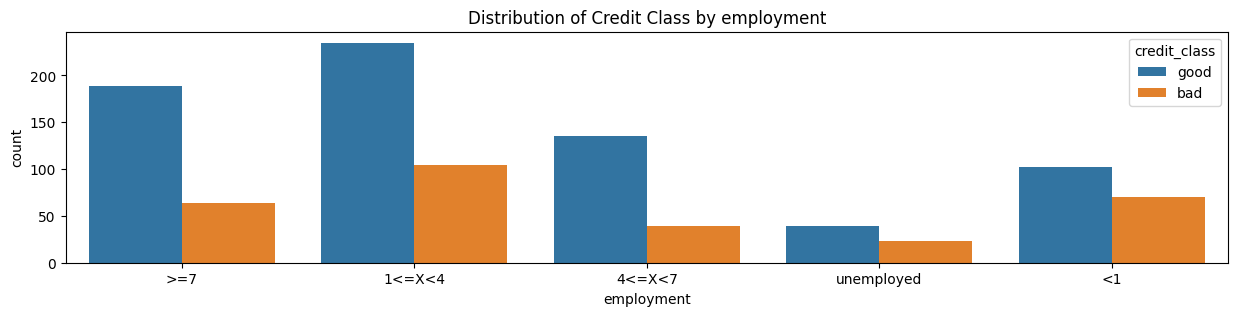

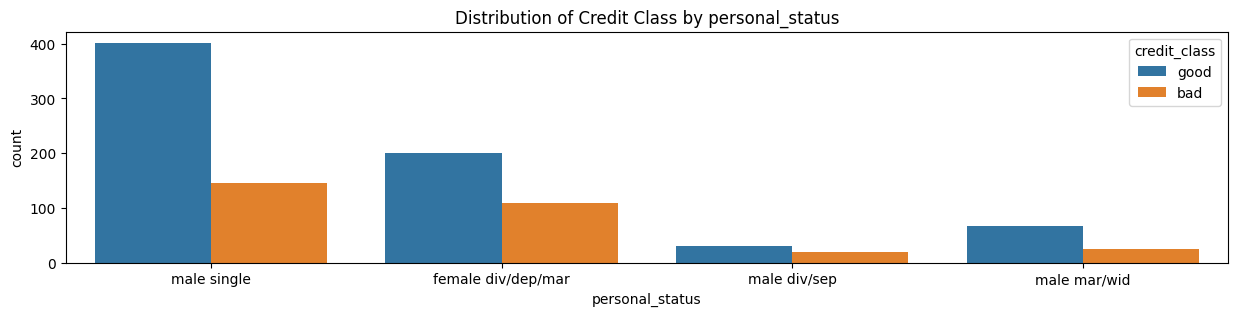

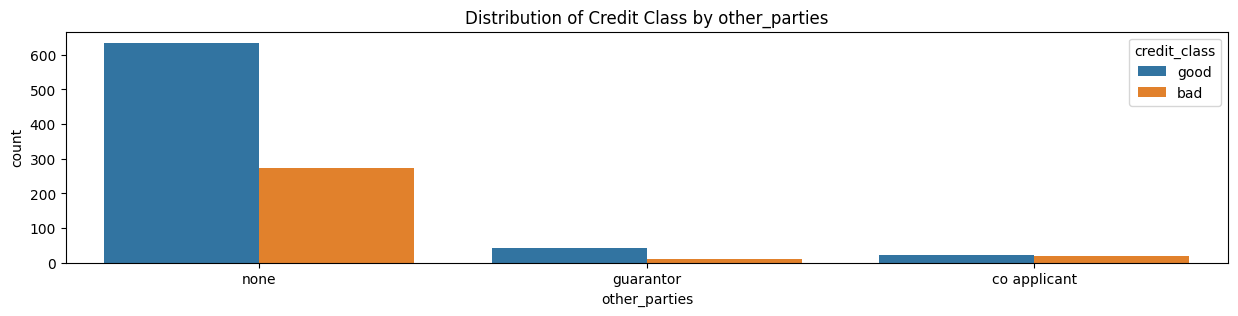

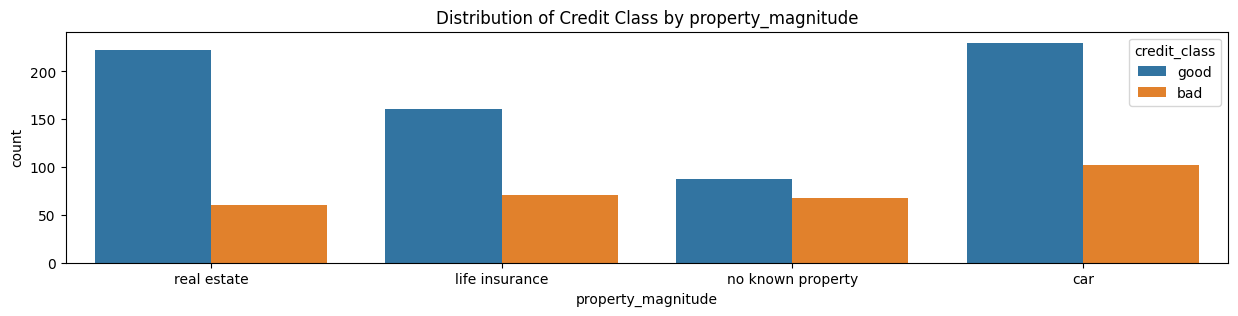

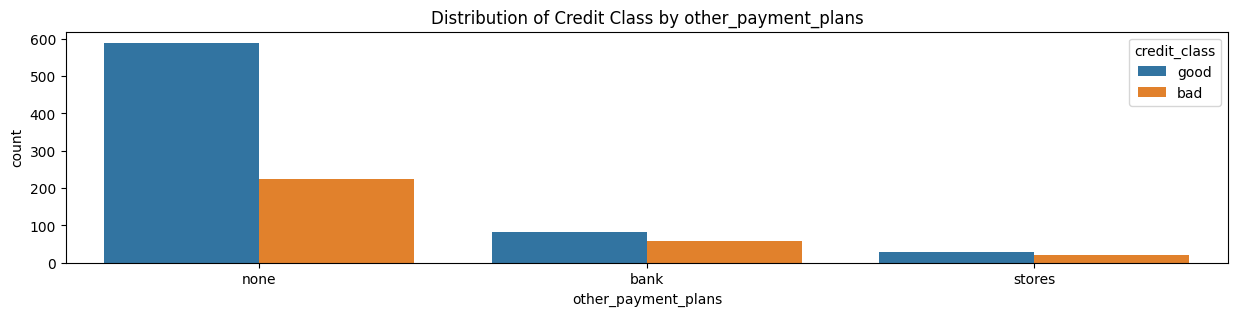

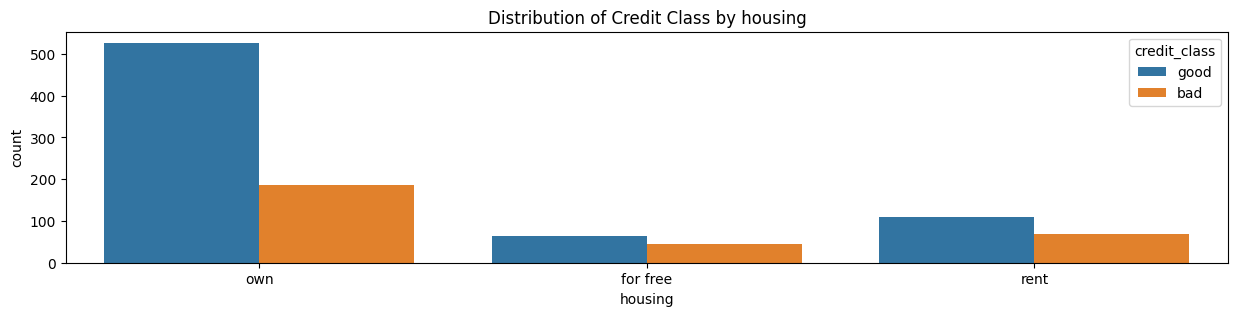

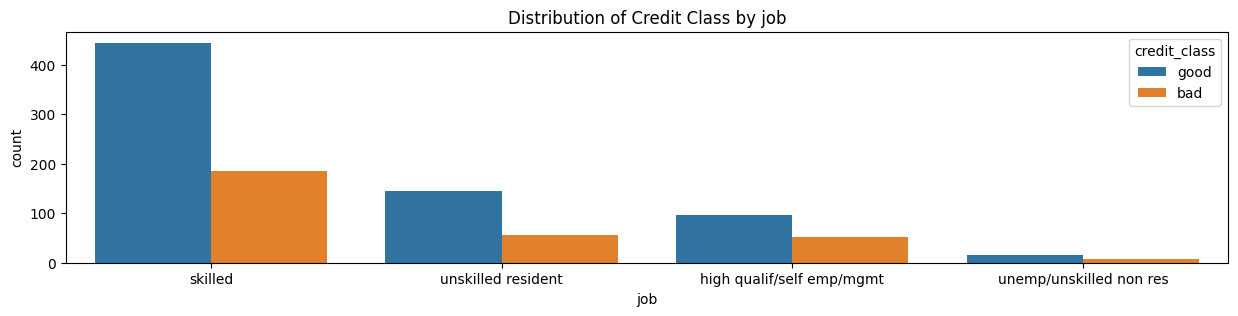

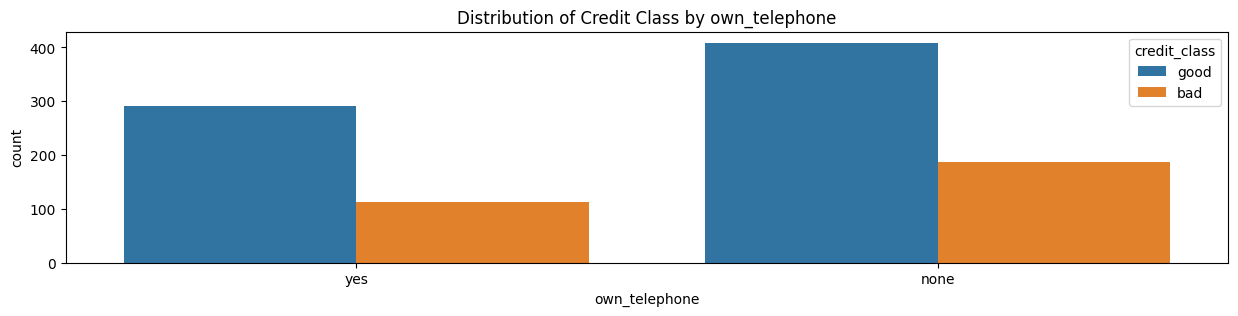

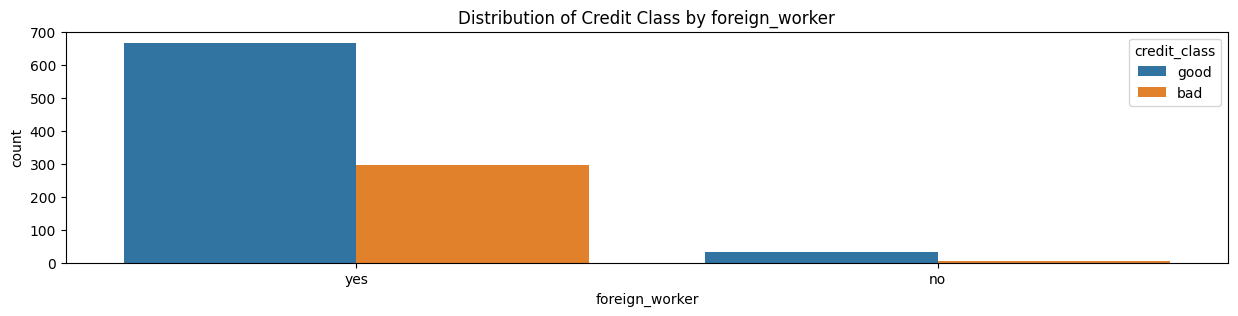

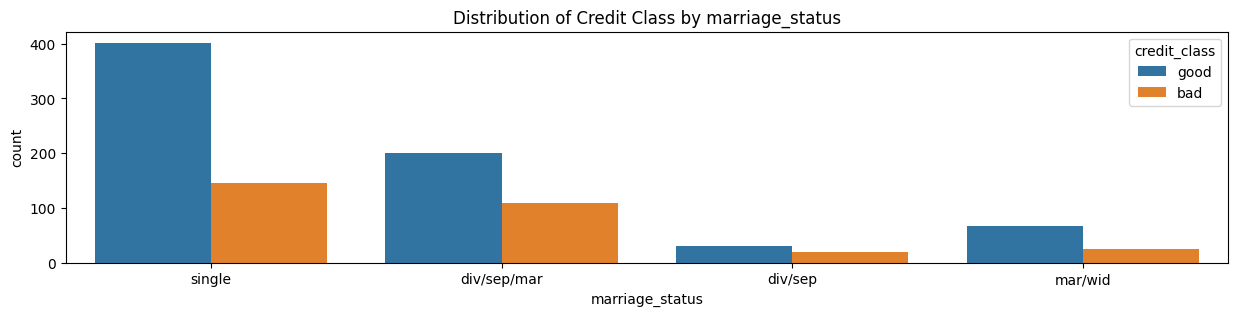

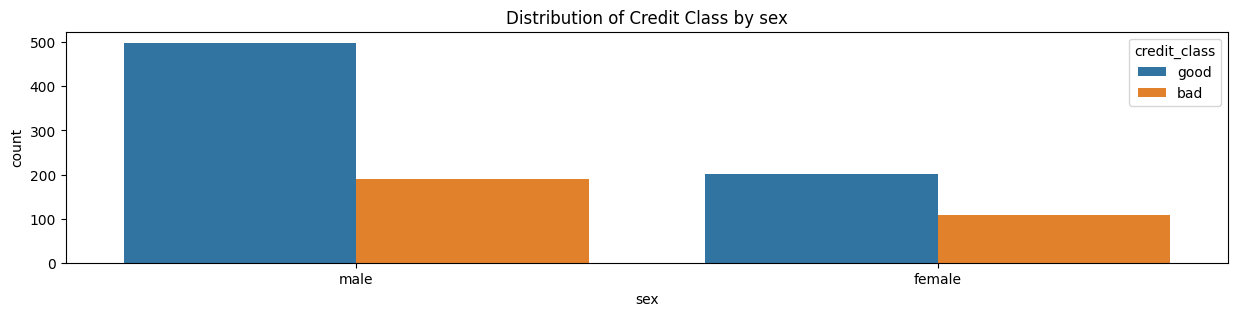

In [71]:
for i in categorical_columns:
  if i!= 'credit_class':
    plt.figure(figsize=(15, 3))
    sns.countplot(x=i, hue='credit_class', data=df)
    plt.title(f'Distribution of Credit Class by {i}')
